In [98]:
#import cifar10 image data
import tensorflow as tf

tf.random.set_seed(42)

#load the data
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = cifar10

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

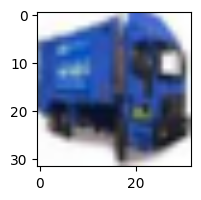

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(X_train[2], interpolation='bilinear')
plt.show()

In [100]:
from keras.models import Sequential
from keras.layers import Dense

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))

for _ in range(20):
    model.add(Dense(100, activation="swish" , kernel_initializer="he_normal"))

model.add(Dense(10, activation="softmax"))

In [101]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("cifar10_DNN.h5", save_best_only=True)

In [102]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [108]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb, model_checkpoint_cb])

Epoch 1/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4077 - accuracy: 0.4982 - val_loss: 1.5591 - val_accuracy: 0.4444
Epoch 2/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.3918 - accuracy: 0.5021 - val_loss: 1.5723 - val_accuracy: 0.4462
Epoch 3/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.3852 - accuracy: 0.5025 - val_loss: 1.6032 - val_accuracy: 0.4296
Epoch 4/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3801 - accuracy: 0.5057 - val_loss: 1.5752 - val_accuracy: 0.4522
Epoch 5/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3691 - accuracy: 0.5094 - val_loss: 1.5451 - val_accuracy: 0.4524
Epoch 6/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3662 - accuracy: 0.5093 - val_loss: 1.5641 - val_accuracy: 0.4520
Epoch 7/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3618 - accuracy: 0.5147 - val_loss: 1.5399 -

In [ ]:
#apply batch normalization

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("swish"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_bn_model", save_best_only=True)


In [ ]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=callbacks)

model.evaluate(X_valid, y_valid)